# Выборочная статистика. Доверительные интервалы.
### Разбираемся методом бутстрапа

In [2]:
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy. stats import sem # для определения стандартной ошибки среднего

In [9]:
# сгенерируем массив случайных значений с нормальным распределением
# это будет наша генеральная совокупность
population = np.random.normal(loc=90, scale=20, size=5000)
population

array([126.65134806,  97.96582347,  78.50905146, ..., 115.51057222,
        58.35357565, 100.66125804])

In [10]:
# стандартное отклонение популяции
sd_population = np.std(population)
sd_population

20.214577237455156

In [11]:
# среднее популяции
population.mean()

89.76654122425171

<AxesSubplot:ylabel='Count'>

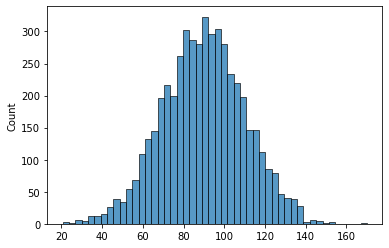

In [12]:
# гистограмма
sns.histplot(data=population)

**Выборка** - это подмножество данных из **генеральной совокупности** (или популяции).

**Выборочная статистика** - показатель статистики, вычисленный для для выборки из популяции. 

**Выборочное распределение** - распределение выборочной статистики на большом числе выборок, вынимаемой из одной и той же популяции.

**Центральная предельная теорема** (ЦПТ)- тенденция выборочного распределения принимать нормальную форму по мере увеличения размера выборки, даже если исходная популяция не является нормально распределенной.

**Стандартная ошибка** (standart error, se) - стандартное отклонение выборочной статистки на многочисленных выборках. По другому: мера изменчивости оценки между выборками. Стандартную ошибку можно оценить с использованием статистики, опираясь на стандартное отклонение s значений выборки и размер выборки n:
$$se=\frac{sd}{\sqrt{n}}$$

Один из простых и эффективных способов оценки выборочного распределения статистики состоит в том, чтобы вынимать дополнительные выборки с возвратом из самой выборки и повторно вычислять статистику для каждой повторной выборки. Данная процедура называется бутстрапом (от англ. **bootstrap** )

**Алгоритм бутстрапа для среднего значения для выборки размером n:**
1. извлечь выборку n элементов с возвратом данных
2. записать целевую статистику для этой выборки
3. повторить шаги 1 и 2 много (R раз)
4. использовать результаты:
    - вычисления их стандартного отколонения = стандартная ошибка выборочного среднего
    - постороения гистограммы
    - нахождения доверительного интервала
    
Число итераций R устанавливается произвольно. Чем больше R, тем точнее оценка стандартной ошибки или доверительного интервала.    

### Выборочное распределение средних

<AxesSubplot:ylabel='Count'>

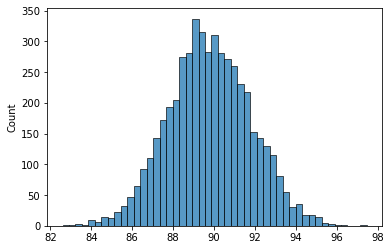

In [13]:
# бустраповская выборка
# отберем n случайных элементов r раз
# сохраним все эти выборки
n = 100
r = 5000
samples = [] # список для хранения всех выборок
for _ in range(r):
    z = random.sample(list(population), n) # сгенерируем случаную выборку n-элементов из популяции
    samples.append(z)
    
# посчитаем среднюю для каждой выборки, сохраним в виде списка и посторим по нему гистограмму, 
# и убедимся, что средние по всем выборкам (распределение выборочных средних) имеют нормальное распределение
m = []
for sample in samples:
    m.append(np.array(sample).mean())
    
sns.histplot(data=m)   

### Стандартная ошибка среднего

Стандартная ошибка среднего — это мера того, насколько разбросаны значения вокруг среднего.\
По мере увеличения размера выборки стандартная ошибка среднего имеет тенденцию к уменьшению.\
Чтобы проиллюстрировать это, рассмотрим стандартную ошибку среднего для нескольких наборов данных:

In [14]:
# Стандартная ошибка среднего для выборки из 10 элементов
sem(random.sample(list(population), 10))

5.900951123115898

In [15]:
# Стандартная ошибка среднего для выборки из 100 элементов
sem(random.sample(list(population), 100))

1.9112377779334806

In [16]:
# Стандартная ошибка среднего для выборки из 500 элементов
sem(random.sample(list(population), 500))

0.9035787539893

In [17]:
# Стандартная ошибка среднего для выборки из 1000 элементов
sem(random.sample(list(population), 1000))

0.6521721081584156

In [18]:
# Стандартная ошибка среднего для выборки из 5000 элементов
sem(random.sample(list(population), 5000))

0.28590588488663643

#### Проверка теоретической формулы для ошибки среднего методом бутстрапа

In [19]:
# посчитаем стандартную ошибку среднего по теоретической формуле
# так как у нас известно стандратное отклонение всей популяции,
# то в формулу для ошибки среднего можем подставить сразу ее, а не выборчное станд. отклонение 
sd_population/(n**0.5)

2.021457723745516

In [20]:
# теперь посчитаем по стандартному отклонению из случайную выборки из n элементов
# сформируем эту выборку
sample = random.sample(list(population), n)
# стандартное отклонение этой выборки
sd_sample = np.std(sample)
# стандартная ошибка среднего по формуле
sd_sample / (n**0.5)

2.075600658923528

In [21]:
# можно воспользоваться функцией из библиотеки scipy
sem(sample)

2.0860571515950834

In [22]:
# теперь посмотрим практическое значение, полученное из бутстраповских выборок
# выше находили m - выборочные средние для бутстраповских выборок размером n
# найдем стандартное отклонение по ним = стандартная ошибка выборочного среднего
np.std(m)

2.007819862906269

In [497]:
# Практическое значение (полученное бутстрапом) и теоретическое (расчитанное по формуле) примерно совпадают.

### Доверительные интервалы
Доверительные интервалы (ДИ) — это еще один способ понять потенциальную ошибку в оценке выборки.
* По ЗБЧ среднее значение выборочных средних стретимся к среднему ГС.
* По ЦПТ распределение оценок среднего стремится к нормальному распределению.
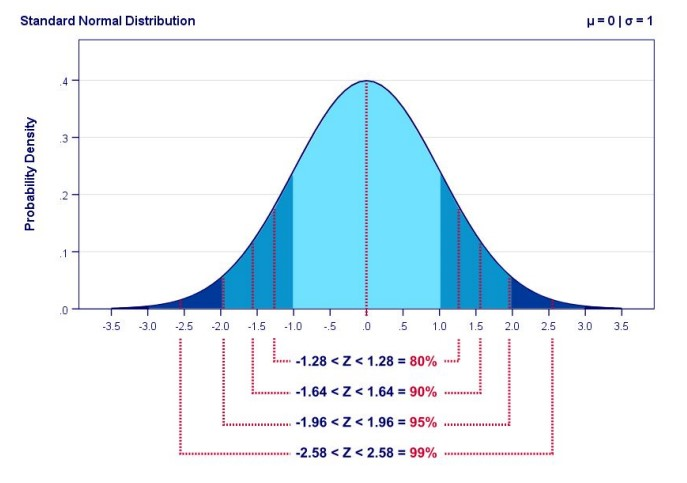

ДИ - это интервал, который покрывает оцениваемый параметр с заданной вероятностью. \
Вероятность следует понимать в том смысле, что если бы мы провели эксперимент множество раз, то в среднем для 95% доверительного интервала **в 95 экспериментах из 100 истинный параметр принадлежал бы доверительному интервалу**.

Как правило, используется ДИ 95%.

ДИ для среднего имеет вид: $(\overline{x} - \Delta; \overline{x} + \Delta)$,

где $\Delta$ - точность интервальной оценки, $\Delta = z_{1-\alpha/2} * se$

Уровень значимости $\alpha$ - это вероятность, с которой значение параметра НЕ попадет в ДИ. \
Уровень доверия $(1-\alpha)$ - это вероятность, с которой значение параметра попадет в ДИ.\
$z_{1-\alpha/2}$ - это  квантиль нормального распределения для уровня $(1-\alpha)$.

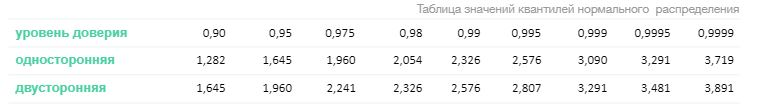

Пример: ДИ = 95% \
уровень доверия = 0,95\
уровень значимости = 0,05\
Доверительный интервал рассчитывается так: 
$[\overline{x}-1.96*se; \overline{x}+1.96*se]$

In [23]:
# Рассмотрим на примере выборки sample
sample = random.sample(list(population), n)
# выборочное среднее
m_sample = np.array(sample).mean()
# выборочное станд отклонение
se_samle = sem(sample)
# Построим 95% доверительный интервал для среднего значения
# рассчитаем левую и правые крайние точки интервала
# посчитаем длину доверительного интервала 
left = m_sample - 1.96*se_samle
right = m_sample + 1.96*se_samle
l = left + right
print(f'{left} + {right} = {left + right}')

86.37372331720383 + 93.3674325509719 = 179.74115586817572


In [24]:
# Сравним со средними, полученными методом бутсрапа
# для этого отсортируем выборочные средние по возрастанию
m.sort()
# и отсечем по 2,5% по краям
left = m[int(len(m)*0.025)]
right =  m[int(len(m)*0.975)]
print(f'{left} + {right} = {left + right}')

85.90027706061682 + 93.68449673575162 = 179.58477379636844


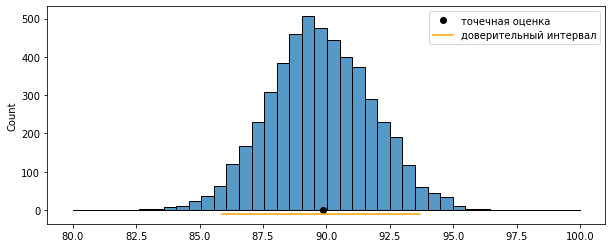

In [25]:
# визулизируем в виде гистограммы
plt.figure(figsize=(10, 4))
graph = sns.histplot(data=m, bins=30)
graph.plot(np.mean(sample), [0], 'o', c='k', markersize=6, label='точечная оценка')
graph.plot((80, 100), [0, 0], linewidth=1, c='k')
graph.plot((left, right), [-10,-10], c = 'orange', label='доверительный интервал')
graph.legend(loc='upper right')

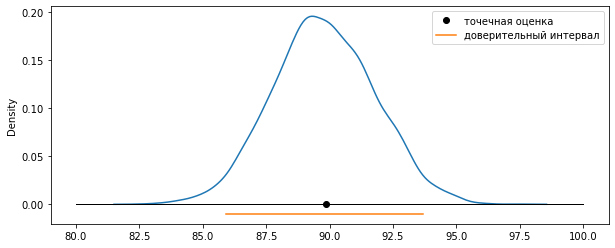

In [26]:
# визулизируем в виде kde
plt.figure(figsize=(10, 4))
graph = sns.kdeplot(data=m)
graph.plot(np.mean(sample), [0], 'o', c='k', markersize=6, label='точечная оценка')
graph.plot((80, 100), [0, 0], linewidth=1, c='k')
graph.plot((left, right), [-0.01,-0.01], label='доверительный интервал')
graph.legend(loc='upper right')


#### Варианты функций для подсчета ДИ

In [45]:
# другой вариант для подсчета доверительного интервала
def mean_confidence_interval_1(data, confidence=0.95): 
    n = len(data)
    m, se = np.mean(data), stats.sem(data)
    h = se * stats.t.ppf((1 + confidence)/2, n)  #  функция ppf из scipy возвращает нам перцентиль
    left, right = m-h, m+h
    return left, right 

In [46]:
mean_confidence_interval_1(sample, confidence=0.95)

(86.33095550344652, 93.4102003647292)

In [47]:
# еще вариант для подсчета доверительного интервала
def mean_confidence_interval_2(data, confidence=0.95): 
    m, se = np.mean(data), stats.sem(data)
    alpha = (1-confidence)/2
    sigma = stats.norm().isf(alpha)
    left, right = m - sigma*se, m + sigma*se
    return left, right 

In [48]:
mean_confidence_interval_2(sample, confidence=0.95)

(86.373787572728, 93.36736829544772)

### Обратная задача: Сколько пользователей нужно включить в тест,  чтобы обеспечить 95% точность?
По доверительному интервалу найти минимальный объем выборки, чтобы с заданной точностью и уровнем доверия оценить среднее:

$$\Delta = z_{1-\alpha/2} * se$$ где  $se = \frac{\sigma}{\sqrt{n}}$ \
Отсюда:

$$n = \bigg(\frac{z_{1-\alpha/2}*sd}{\Delta}\bigg)^2$$

In [ ]:
test